In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
train_data_orig = pd.read_csv('C:\\Users\\marku\\Documents\\SteelProdData_Project\\data\\raw\\normalized_train_data.csv')
test_data_orig = pd.read_csv('C:\\Users\\marku\\Documents\\SteelProdData_Project\\data\\raw\\normalized_test_data.csv')


In [10]:
conc_data=pd.concat([train_data_orig, test_data_orig], ignore_index=True)

In [ ]:
#Replace missing values with mean of the columns
numerical_cols = conc_data.select_dtypes(include=np.number).columns.tolist() 
conc_data[numerical_cols] = conc_data[numerical_cols].apply(lambda x: x.fillna(x.mean()), axis=0) # Fill NaN with column mean

In [26]:
#Check for missing values

# Define a set of values that should be treated as empty/missing
EMPTY_TOKENS = {"", " ", "NA", "N/A", "null", "None", "nan", "-"}

# Create a copy of the dataframe to avoid modifying the original
conc_data_check = conc_data.copy()

# Convert empty strings and placeholder values to NaN in object columns
obj_cols = conc_data_check.select_dtypes(include=["object"]).columns
for c in obj_cols:
    conc_data_check[c] = (
        conc_data_check[c]
        .astype(str)        # Convert all values to strings
        .str.strip()        # Remove leading/trailing whitespace
        .replace(EMPTY_TOKENS, np.nan)  # Replace empty tokens with NaN
    )

# Create a summary dataframe with statistics about each column
summary = pd.DataFrame({
    "dtype": conc_data_check.dtypes.astype(str),      # Data type of each column
    "rows_total": len(conc_data_check),               # Total number of rows
    "non_null": conc_data_check.notna().sum(),        # Count of non-null values
    "nulls": conc_data_check.isna().sum(),            # Count of null values
    "null_frac": (conc_data_check.isna().mean()),     # n_NaN/n_all_Entries
    "n_unique": conc_data_check.nunique(dropna=True), # Count of unique non-null values
})
# Sort the summary by null fraction
summary = summary.sort_values("null_frac", ascending=False)


display(summary)

dtype  rows_total  non_null  nulls  null_frac  n_unique
output   float64       10979     10979      0        0.0       250
input1   float64       10979     10979      0        0.0         5
input20  float64       10979     10979      0        0.0        51
input19  float64       10979     10979      0        0.0       210
input18  float64       10979     10979      0        0.0        42
input17  float64       10979     10979      0        0.0       164
input16  float64       10979     10979      0        0.0        70
input15  float64       10979     10979      0        0.0        44
input14  float64       10979     10979      0        0.0        55
input13  float64       10979     10979      0        0.0        76
input12  float64       10979     10979      0        0.0       141
input11  float64       10979     10979      0        0.0       114
input10  float64       10979     10979      0        0.0       117
input9   float64       10979     10979      0        0.0        54
input8   float64       10979     10979      0        0.0        86
input7   float64       10979     10979      0        0.0        32
input6   float64       10979     10979      0        0.0      1838
input5   float64       10979     10979      0        0.0        25
input4   float64       10979     10979      0        0.0       286
input3   float64       10979     10979      0        0.0       431
input2   float64       10979     10979      0        0.0       315
input21  float64       10979     10979      0        0.0       185

In [27]:
#Check for duplicates

# Count duplicate rows based on all input and output columns
n_dup = conc_data_check.duplicated().sum()
print(f"Duplikate über input1..input21 + output: {n_dup}")

# Display duplicate rows
dup_rows = conc_data_check[conc_data_check.duplicated(keep=False)].copy()

display(dup_rows.head(5))  # Display first 5 duplicate rows


Duplikate über input1..input21 + output: 0


Empty DataFrame
Columns: [output, input1, input2, input3, input4, input5, input6, input7, input8, input9, input10, input11, input12, input13, input14, input15, input16, input17, input18, input19, input20, input21]
Index: []

[0 rows x 22 columns]

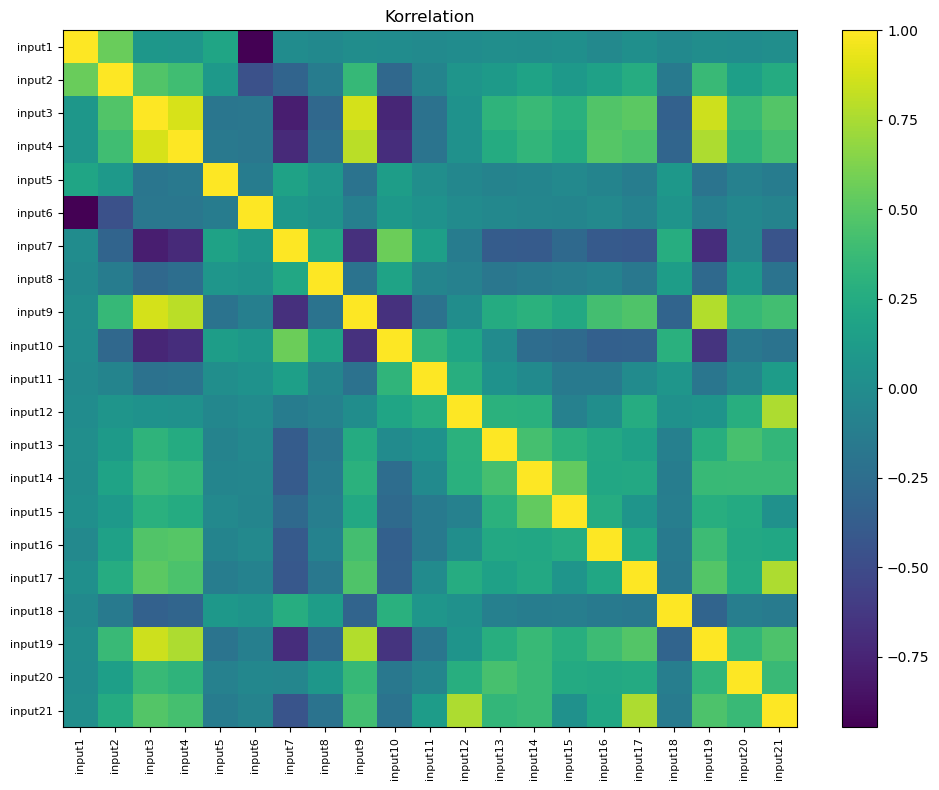

In [28]:


num_cols = conc_data.select_dtypes(include=["number"]).columns.tolist()
num_cols.remove("output")                             #Remove column output from correlation analysis


corr_cols = num_cols[:] 
corr = conc_data[corr_cols].corr()  
plt.figure(figsize=(10, 8))
plt.imshow(corr.values, aspect="auto")
plt.title("Korrelation")
plt.colorbar()

plt.xticks(range(len(corr_cols)), corr_cols, rotation=90, fontsize=8)
plt.yticks(range(len(corr_cols)), corr_cols, fontsize=8)

plt.tight_layout()
plt.show()

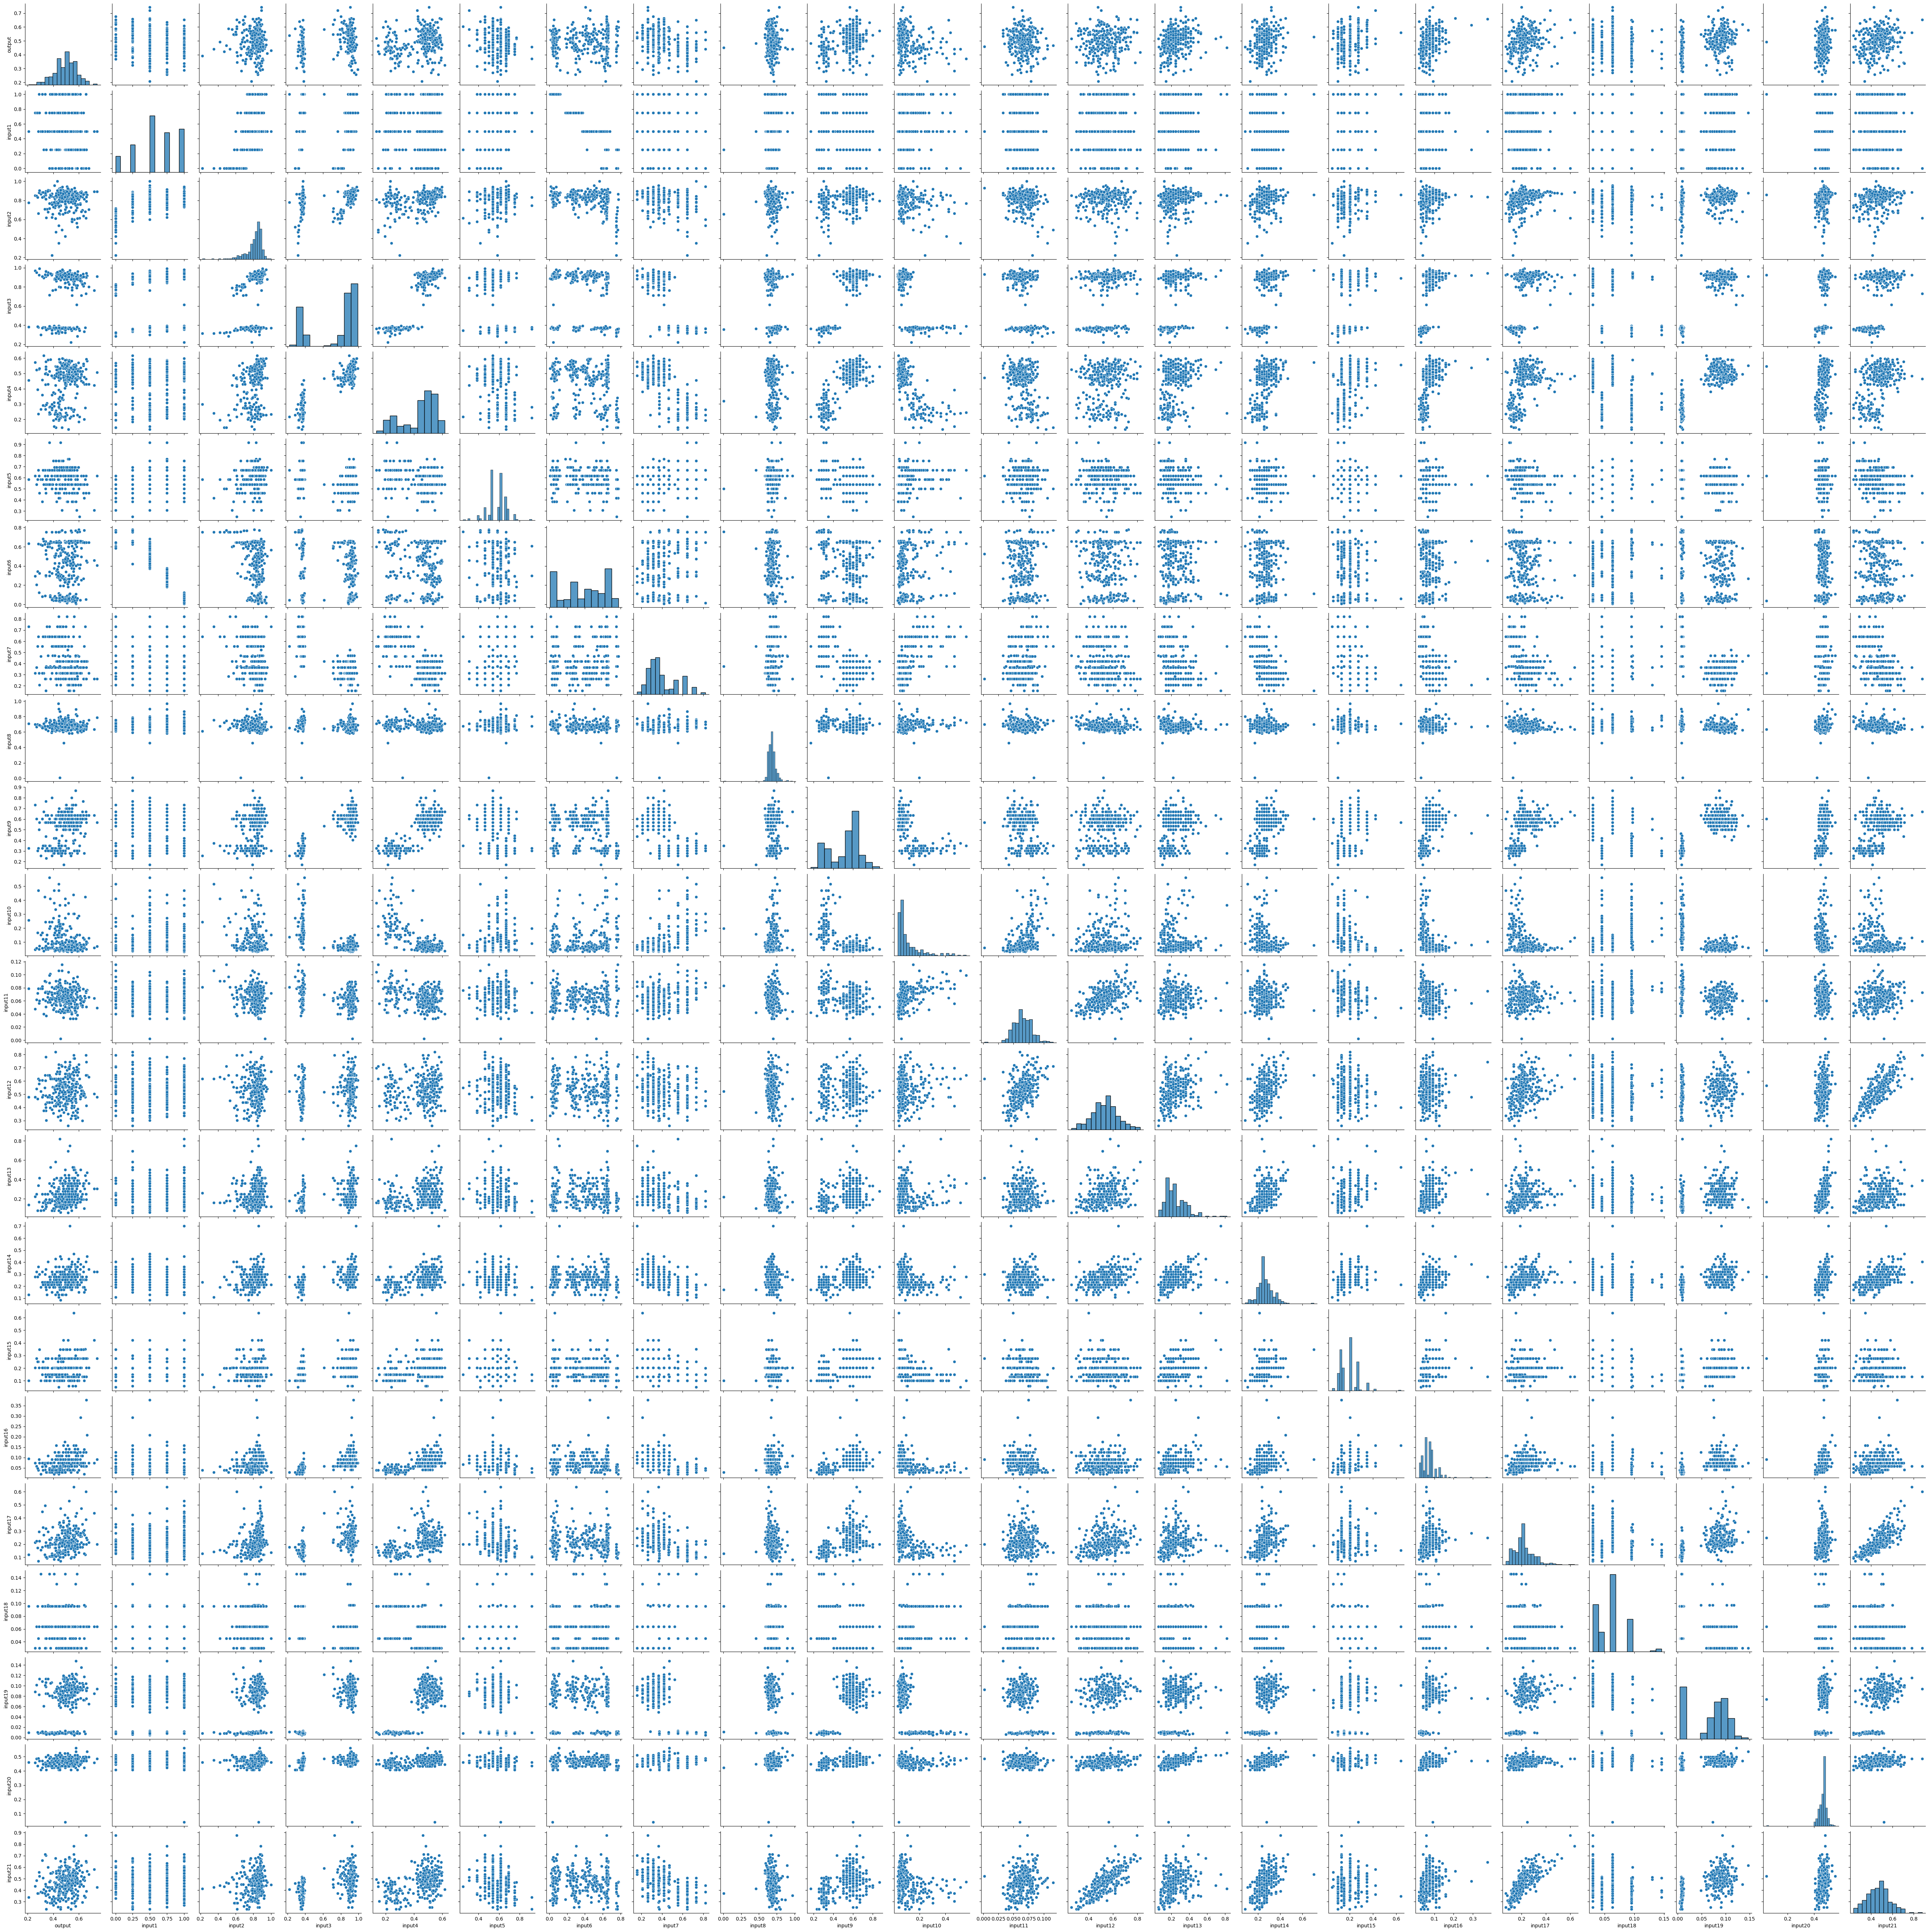

In [36]:
import seaborn as sns

g=sns.pairplot(conc_data.sample(n=300, random_state=42)) #Plot pairwise relationships with sample of 300 rows

(array([9.000e+00, 5.000e+01, 3.390e+02, 1.280e+03, 3.719e+03, 4.657e+03,
        8.680e+02, 5.300e+01, 2.000e+00, 2.000e+00]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

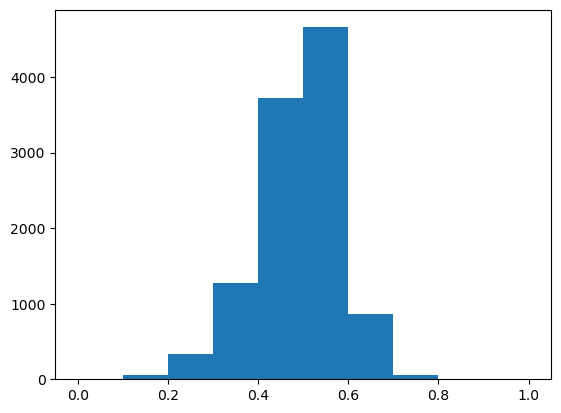

In [35]:
plt.hist(conc_data["output"])

In [ ]:
import seaborn as sns

g=sns.pairplot(conc_data.sample(300))

In [ ]:
#Test/Train_Split

X=conc_data.drop("output", axis=1 ).values
y=conc_data["output"].values


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=35)

In [ ]:
#Establish Baseline Model with Linear Regression

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
s=StandardScaler() 
s.fit(X_train)       

X_train_trans= s.transform(X_train) 
X_test_trans=s.transform(X_test)

model=LinearRegression()

model.fit(X_train, y_train)

print(model.score(X_test_trans,y_test))